In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
Xtr=np.loadtxt("D:/freeLancing/Mini ML As-2/TrainData.csv") 
Ytr=np.loadtxt("D:/freeLancing/Mini ML As-2/TrainLabels.csv")
Xts=np.loadtxt("D:/freeLancing/Mini ML As-2/TestData.csv")

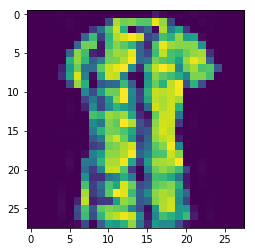

In [5]:
plt.imshow(Xts[1].reshape(28,28))

In [17]:
np.random.seed(10)
shuffle_index = np.random.permutation(12000)
X_train, y_train = Xtr[shuffle_index], Ytr[shuffle_index]

#  Feature extraction

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [19]:
def featureExtraction(X,Y):
    # define feature selection
    fs = SelectKBest(score_func=f_classif,)
    # apply feature selection
    X_selected = fs.fit_transform(X,Y)
    return X_selected
x_new_train=featureExtraction(X_train,y_train)
x_new_train.shape


(12000, 10)

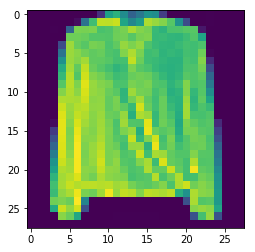

In [29]:
plt.imshow(X_train[1].reshape(28,28))

# Training a model

Random Forest Algorithm

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, Ytr)
# summarize results


In [33]:
grid_result.best_score_

0.5018333333333334

In [43]:
grid_result.predict(X_train)


array([-1.,  1.,  1., ...,  1., -1., -1.])

In [58]:
pkl_filename = "D:/freeLancing/Mini ML As-2/model/RandomforestForMinist.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_result, file)